<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/M_BAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using the technique of Havlena and Odeh the material balance for a gascap drive reservoir can be expressed as :

## $F = N (Eo + mEg )$

Where, F = Underground Withdrawl, N = OIIP, Eo = Oil Expansion factor, Eg = Gas expansion factor, m = initial downhole gas/oil volume ratio


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
Pb = 3330
Pi = 3330
P = np.array([3330,3150,3000,2850,2700,2550,2400]) #psi
Np = np.array([0, 3.295, 5.903,8.852,11.503,14.513,17.730]) #MMSTB
Rp  = np.array([0,1050,1060,1160,1235,1265,1300]) #scf/stb
Bo = np.array([1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]) #rb/STB
Rs = np.array([510,477,450,425,401,375,352]) #scf/stb
Bg = np.array([0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]) #rb/scf

In [6]:
df = pd.DataFrame({'P':P,'Np':Np,'Rp':Rp,'Bo':Bo,'Rs':Rs,'Bg':Bg})

In [7]:
df

,P,Np,Rp,Bo,Rs,Bg
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


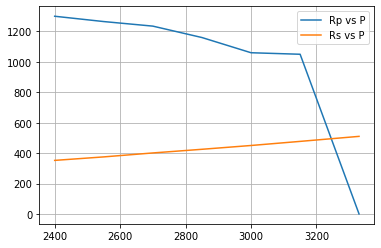

In [19]:
#Let's See the variation of all these parameters with Pressure for self analysis
plt.figure(figsize=(6,4))

# plt.plot(P,Np*1000,label='Np vs P')
# plt.plot(P,Bo,label='Bo vs P')
plt.plot(P,Rp,label='Rp vs P')
plt.plot(P,Rs,label='Rs vs P')
# plt.plot(P,Bg,label='Bg vs P')

plt.legend(loc='best')
plt.grid()


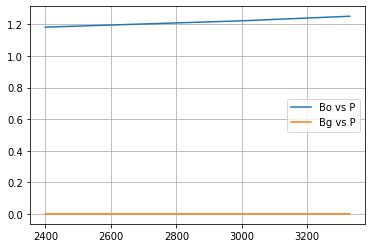

In [18]:
#Let's See the variation of all these parameters with Pressure for self analysis
plt.figure(figsize=(6,4))

# plt.plot(P,Np*1000,label='Np vs P')
plt.plot(P,Bo,label='Bo vs P')
# plt.plot(P,Rp,label='Rp vs P')
# plt.plot(P,Rs,label='Rs vs P')
plt.plot(P,Bg,label='Bg vs P')

plt.legend(loc='best')
plt.grid()


#Problem statement continued: 
The size of the gascap is uncertain with the best estimate, based on geological
information, giving the value of m = 0.4. 
What's the impact of m on N, show that with different values of m, how the estimated N varies. 
##Find the correct m and N

,P,Np,Rp,Bo,Rs,Bg
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


In [27]:
Eo = Bo - Bo[0] + (Rs[0] - Rs)*Bg

In [23]:
F = Np*(Bo + (Rp - Rs)*Bg) #MMrb

In [24]:
Eg = Bo[0]*((Bg/Bg[0])-1)

In [28]:
df_MBE = pd.DataFrame({'P':P,'F':F,'Eo':Eo,'Eg':Eg})

In [29]:
df_MBE

,P,F,Eo,Eg
0,3330,0.000000,0.00000,0.000000
1,3150,5.807306,0.01456,0.071902
2,3000,10.671443,0.02870,0.129424
3,2850,17.301677,0.04695,0.201326
4,2700,24.093954,0.06773,0.287609
5,2550,31.898123,0.09365,0.373892
6,2400,41.130054,0.12070,0.474555


In [30]:
# now let's assume 3 values of m - 0.4,0.5,0.6
m1 = 0.4 
m2 = 0.5
m3 = 0.6

In [37]:
Eo_plus_mEg_1 = Eo + m1*Eg
Eo_plus_mEg_2 = Eo + m2*Eg
Eo_plus_mEg_3 = Eo + m3*Eg

In [40]:
df_MBE['RHS_1'] = Eo_plus_mEg_1
df_MBE['RHS_2'] = Eo_plus_mEg_2
df_MBE['RHS_3'] = Eo_plus_mEg_3

In [42]:
df_MBE = df_MBE.drop('Eo + mEg',axis=1)

In [43]:
df_MBE

,P,F,Eo,Eg,RHS_1,RHS_2,RHS_3
0,3330,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,3150,5.807306,0.01456,0.071902,0.043321,0.050511,0.057701
2,3000,10.671443,0.02870,0.129424,0.080470,0.093412,0.106354
3,2850,17.301677,0.04695,0.201326,0.127481,0.147613,0.167746
4,2700,24.093954,0.06773,0.287609,0.182774,0.211535,0.240296
5,2550,31.898123,0.09365,0.373892,0.243207,0.280596,0.317985
6,2400,41.130054,0.12070,0.474555,0.310522,0.357978,0.405433


Text(0.5, 1.0, 'Slope gives us The N (Oil in Place')

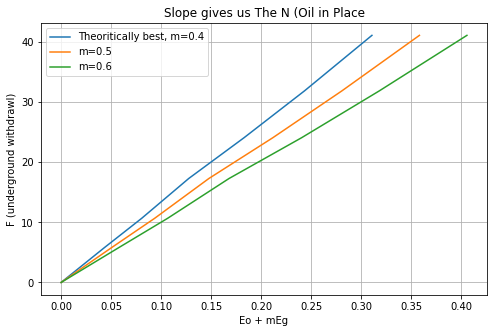

In [46]:
plt.figure(figsize=(8,5))

plt.plot(df_MBE['RHS_1'],F,label='Theoritically best, m=0.4')
plt.plot(df_MBE['RHS_2'],F,label='m=0.5')
plt.plot(df_MBE['RHS_3'],F,label='m=0.6')

plt.grid()
plt.legend(loc='best')

plt.xlabel('Eo + mEg')
plt.ylabel('F (underground withdrawl)')
plt.title('Slope gives us The N (Oil in Place')

In [61]:
slope, intercept = np.polyfit(df_MBE['RHS_1'],F, 1)

In [62]:
print(slope)

131.77712071961054


In [63]:
slope2, intercept2 = np.polyfit(df_MBE['RHS_2'],F, 1)
slope3, intercept3 = np.polyfit(df_MBE['RHS_3'],F, 1)
slope1, intercept = np.polyfit(df_MBE['RHS_1'],F, 1)

In [64]:
print(f'1. The Estimate of N (Oil in place) with m = 0.4 is {slope1} MMSTB')
print(f'2. The Estimate of N (Oil in place) with m = 0.5 is {slope2} MMSTB')
print(f'2. The Estimate of N (Oil in place) with m = 0.6 is {slope3} MMSTB')

1. The Estimate of N (Oil in place) with m = 0.4 is 131.77712071961054 MMSTB
2. The Estimate of N (Oil in place) with m = 0.5 is 114.37046619758794 MMSTB
2. The Estimate of N (Oil in place) with m = 0.6 is 101.024892196518 MMSTB


#Method 2 : Finding N with another plots to verify results

## $ \frac{F}{Eo} = N + mN \frac{Eg}{Eo}$

In [68]:
df_MBE['F/Eo'] = df_MBE['F']/df_MBE['Eo']
df_MBE['Eg/Eo'] = df_MBE['Eg']/df_MBE['Eo']

In [82]:
mn, n = np.polyfit(df_MBE['Eg/Eo'].iloc[1:],df_MBE['F/Eo'].iloc[1:], 1)

Text(0.5, 1.0, 'A history match/verification of results')

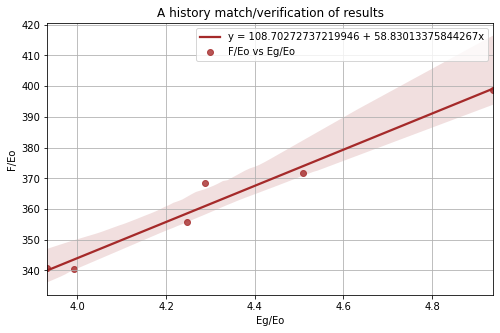

In [87]:
plt.figure(figsize=(8,5))

sns.regplot(x='Eg/Eo',y='F/Eo',data=df_MBE,label = 'F/Eo vs Eg/Eo',line_kws={'label':f'y = {n} + {mn}x'},color='brown')


plt.grid()
plt.legend(loc='best')
plt.title('A history match/verification of results')

In [75]:
mn, n = np.polyfit(df_MBE['Eg/Eo'].iloc[1:],df_MBE['F/Eo'].iloc[1:], 1)

In [77]:
print(f'1.Based on the practical production Data, The correct value of N(OIP) is: {n}')
print(f'2.Based on the practical production Data, The correct value of m is: {mn/n}')

1.Based on the practical production Data, The correct value of N(OIP) is: 108.70272737219946
2.Based on the practical production Data, The correct value of m is: 0.5412020027520338


In [78]:
#